In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


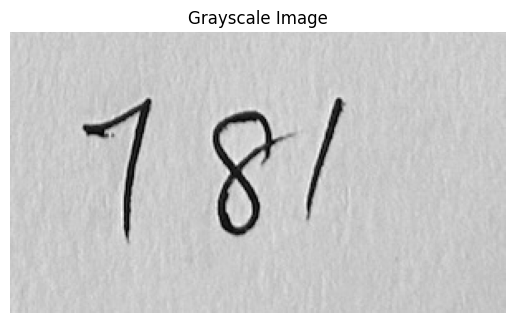

In [30]:
# Load image in grayscale mode
image = cv2.imread('./Assignment_CV/781.jpeg', cv2.IMREAD_GRAYSCALE)

# Display the loaded image
if image is not None:
    plt.imshow(image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    plt.show()
else:
    print("Error: Image not loaded.")


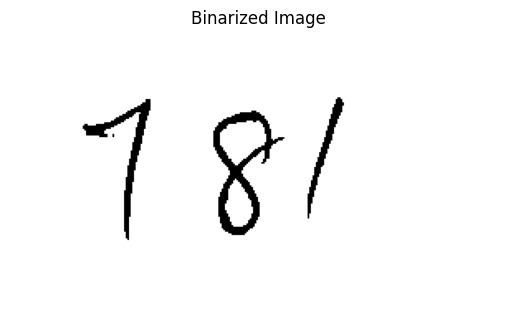

In [31]:
# Binarize the image using Otsu's thresholding
_, binimg = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the binarized image
plt.imshow(binimg, cmap='gray')
plt.title('Binarized Image')
plt.axis('off')
plt.show()


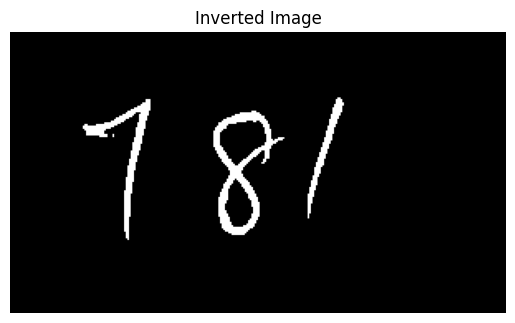

In [33]:
# Invert the binary image
inverted = cv2.bitwise_not(binimg)

# Display the inverted image
plt.imshow(inverted, cmap='gray')
plt.title('Inverted Image')
plt.axis('off')
plt.show()


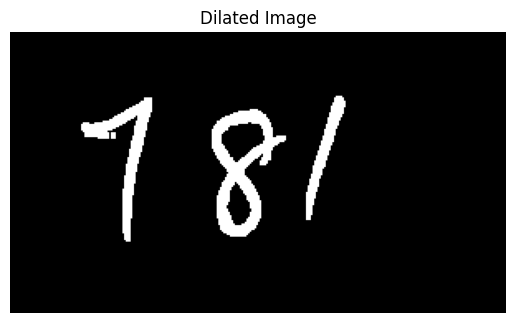

In [34]:
# Create a kernel for dilation
kernel = np.ones((3, 3), np.uint8)

# Dilate the image to increase the thickness of each digit
dilated = cv2.dilate(inverted, kernel, iterations=1)

# Display the dilated image
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')
plt.show()


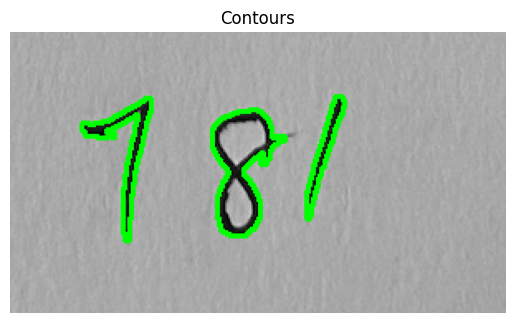

In [35]:
# Find contours
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours for visualization
contour_image = image.copy()
contour_image_colored = cv2.cvtColor(contour_image, cv2.COLOR_GRAY2BGR)

cv2.drawContours(contour_image_colored, contours, -1, (0, 255, 0), 2)

# Display the contours
plt.imshow(cv2.cvtColor(contour_image_colored, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.axis('off')
plt.show()


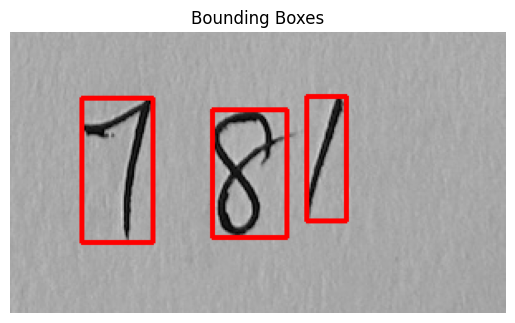

In [36]:
# List to hold bounding boxes
rects = []

# Iterate through contours and get bounding boxes
for contour in contours:
    # Calculate the area of the contour
    area = cv2.contourArea(contour)
    
    # Filter out small contours based on a threshold
    if area > 50:  # Adjust the threshold value as needed
        x, y, w, h = cv2.boundingRect(contour)
        rects.append((x, y, w, h))

# Sort the bounding boxes by the x-coordinate (left to right)
rects.sort(key=lambda rect: rect[0])

# Draw the sorted bounding boxes
bounding_box_image = image.copy()
bounding_box_image_colored = cv2.cvtColor(bounding_box_image, cv2.COLOR_GRAY2BGR)

for rect in rects:
    x, y, w, h = rect
    cv2.rectangle(bounding_box_image_colored, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Display the bounding boxes
plt.imshow(cv2.cvtColor(bounding_box_image_colored, cv2.COLOR_BGR2RGB))
plt.title('Bounding Boxes')
plt.axis('off')
plt.show()


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Set random seed for reproducibility
seed = 123
tf.random.set_seed(seed)

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = models.Sequential()

model.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(50, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 classes

# Compile the model
model.compile(optimizer='Nadam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
epochs = 5
batch_size = 64
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Save the model
model.save('cnn-model.h5')


c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9048 - loss: 0.3110
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9865 - loss: 0.0447
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9909 - loss: 0.0287
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9940 - loss: 0.0200
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9945 - loss: 0.0170
313/313 - 2s - 6ms/step - accuracy: 0.9916 - loss: 0.0294


Test accuracy: 0.991599977016449


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


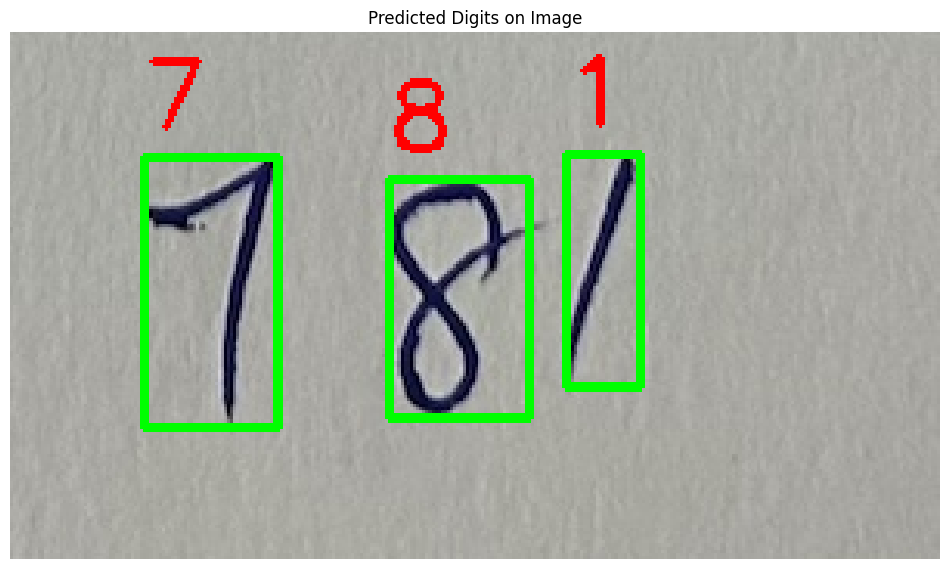

In [29]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load pre-trained model
model = load_model('cnn-model.h5')

# Digits array for output mapping
DIGITS = [str(i) for i in range(10)]

# Load image in grayscale
image = cv2.imread('./Assignment_CV/781.jpeg', cv2.IMREAD_GRAYSCALE)

# Binarize the image using Otsu's thresholding
_, binimg = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Invert the binary image
inverted = cv2.bitwise_not(binimg)

# Create a kernel for dilation
kernel = np.ones((3, 3), np.uint8)

# Dilate the image to enhance digits
dilated = cv2.dilate(inverted, kernel, iterations=1)

# Find contours
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# List to hold bounding boxes
rects = []

# Filter contours based on area to remove noise
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 50:  # Threshold to exclude small dots
        x, y, w, h = cv2.boundingRect(contour)
        rects.append((x, y, w, h))

# Sort bounding boxes by x-coordinate for left-to-right reading
rects.sort(key=lambda rect: rect[0])

# Load the original image in color to annotate predictions
result_image = cv2.imread('./Assignment_CV/781.jpeg', cv2.IMREAD_COLOR)

# Process and classify each digit
for i, (x, y, w, h) in enumerate(rects):
    # Extract digit ROI from the dilated image
    digit = dilated[y:y+h, x:x+w]
    
    # Add padding to make the digit square
    digit = cv2.copyMakeBorder(digit, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=0)
    
    # Resize to 28x28 for model compatibility
    digit = cv2.resize(digit, (28, 28))
    
    # Normalize the digit for prediction
    digit = digit.astype('float32') / 255.0
    digit = digit.reshape(1, 28, 28, 1)
    
    # Predict the digit using the model
    output = model.predict(digit)
    idx = np.argmax(output)
    
    # Annotate the result image with the predicted digit
    cv2.putText(result_image, DIGITS[idx], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.rectangle(result_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Convert the result image from BGR to RGB for Matplotlib
result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

# Display the result image with predictions
plt.figure(figsize=(12, 8))
plt.imshow(result_image_rgb)
plt.title('Predicted Digits on Image')
plt.axis('off')
plt.show()


In [17]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

def preprocess_image(image_path):
    """Load and preprocess the image."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binimg = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    inverted = cv2.bitwise_not(binimg)
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(inverted, kernel, iterations=1)
    
    # Find contours
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter contours by area to exclude noise
    rects = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 50:  # Adjust this threshold as necessary
            x, y, w, h = cv2.boundingRect(contour)
            rects.append((x, y, w, h))
    
    # Sort bounding boxes by x-coordinate
    rects.sort(key=lambda rect: rect[0])
    return dilated, rects

def predict_digit_sequence(image_path, model):
    """Predict the sequence of digits in an image."""
    dilated, rects = preprocess_image(image_path)
    digit_sequence = ""
    
    for x, y, w, h in rects:
        # Extract and preprocess each digit
        digit = dilated[y:y+h, x:x+w]
        digit = cv2.copyMakeBorder(digit, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=0)
        digit = cv2.resize(digit, (28, 28)).astype('float32') / 255.0
        digit = digit.reshape(1, 28, 28, 1)
        
        # Predict the digit
        output = model.predict(digit)
        idx = np.argmax(output)
        digit_sequence += str(idx)
    
    return digit_sequence

def process_images(folder_path, model_path, output_csv_path):
    """Process all images in a folder and save predictions to a CSV."""
    model = load_model(model_path)
    results = []

    for file_name in sorted(os.listdir(folder_path)):
        if file_name.endswith('.jpeg'):
            image_path = os.path.join(folder_path, file_name)
            digit_sequence = predict_digit_sequence(image_path, model)
            results.append({'Image Name': file_name, 'Predicted Sequence': digit_sequence})
    
    # Save results to a CSV file
    df = pd.DataFrame(results)
    df.to_csv(output_csv_path, index=False)
    print(f"Predictions saved to {output_csv_path}")

# Example Usage
folder_path = './Assignment_CV'
model_path = 'cnn-model.h5'
output_csv_path = './predicted_digits.csv'

process_images(folder_path, model_path, output_csv_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

In [19]:
import pandas as pd
from tabulate import tabulate

def display_csv_as_table(csv_path):
    """Display the content of a CSV file as a formatted table with borders."""
    try:
        df = pd.read_csv(csv_path)
        print("\nPredicted Digits:")
        print(tabulate(df, headers='keys', tablefmt='grid'))  # Display table with grid borders
    except FileNotFoundError:
        print(f"Error: File '{csv_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example Usage
output_csv_path = './predicted_digits.csv'
display_csv_as_table(output_csv_path)



Predicted Digits:
+----+--------------+----------------------+
|    | Image Name   |   Predicted Sequence |
+====+==============+======================+
|  0 | 1024.jpeg    |                 1024 |
+----+--------------+----------------------+
|  1 | 11128.jpeg   |                11128 |
+----+--------------+----------------------+
|  2 | 112.jpeg     |                 9112 |
+----+--------------+----------------------+
|  3 | 123.jpeg     |                  123 |
+----+--------------+----------------------+
|  4 | 123_1.jpeg   |                  123 |
+----+--------------+----------------------+
|  5 | 124.jpeg     |                   62 |
+----+--------------+----------------------+
|  6 | 1268.jpeg    |                 1268 |
+----+--------------+----------------------+
|  7 | 13.jpeg      |                   13 |
+----+--------------+----------------------+
|  8 | 1618.jpeg    |                 1618 |
+----+--------------+----------------------+
|  9 | 163.jpeg     |               

In [21]:
import pandas as pd

# Load ground truth and predictions
ground_truth = pd.read_csv('ground_truth.csv')
predictions = pd.read_csv('predicted_digits.csv')

# Merge on Image Name
merged = ground_truth.merge(predictions, on='Image Name')

# Compute accuracy
merged['Correct'] = merged['True Sequence'] == merged['Predicted Sequence']
accuracy = merged['Correct'].mean() * 100
print(f"Accuracy: {accuracy:.2f}%")

# Save mismatched results for review
mismatched = merged[~merged['Correct']]
mismatched.to_csv('mismatched_results.csv', index=False)


Accuracy: 60.98%


In [23]:
csv_path = './mismatched_results.csv'
df = pd.read_csv(csv_path)
print("\nMismatched Digits:")
print(tabulate(df, headers='keys', tablefmt='grid'))



Mismatched Digits:
+----+--------------+-----------------+----------------------+-----------+
|    | Image Name   |   True Sequence |   Predicted Sequence | Correct   |
+====+==============+=================+======================+===========+
|  0 | 112.jpeg     |             112 |                 9112 | False     |
+----+--------------+-----------------+----------------------+-----------+
|  1 | 124.jpeg     |             124 |                   62 | False     |
+----+--------------+-----------------+----------------------+-----------+
|  2 | 163.jpeg     |             163 |                  263 | False     |
+----+--------------+-----------------+----------------------+-----------+
|  3 | 218.jpeg     |             218 |                  418 | False     |
+----+--------------+-----------------+----------------------+-----------+
|  4 | 4012.jpeg    |            4012 |                 4016 | False     |
+----+--------------+-----------------+----------------------+-----------+
|  5 